In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-10-25'
end = '2024-11-25'
stock = 'TSLA'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2014-10-27,14.778000,15.640667,14.687333,15.616667,143299500
1,2014-10-28,16.184668,16.306667,15.216667,15.306667,157744500
2,2014-10-29,15.873333,16.100000,15.709333,16.075333,74437500
3,2014-10-30,15.910667,16.033333,15.670667,15.876000,48426000
4,2014-10-31,16.113333,16.208000,15.916667,16.167334,56629500
...,...,...,...,...,...,...
2532,2024-11-18,338.739990,348.549988,330.010010,340.730011,126547500
2533,2024-11-19,346.000000,347.380005,332.750000,335.760010,88852500
2534,2024-11-20,342.029999,346.600006,334.299988,345.000000,66340700


In [5]:
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

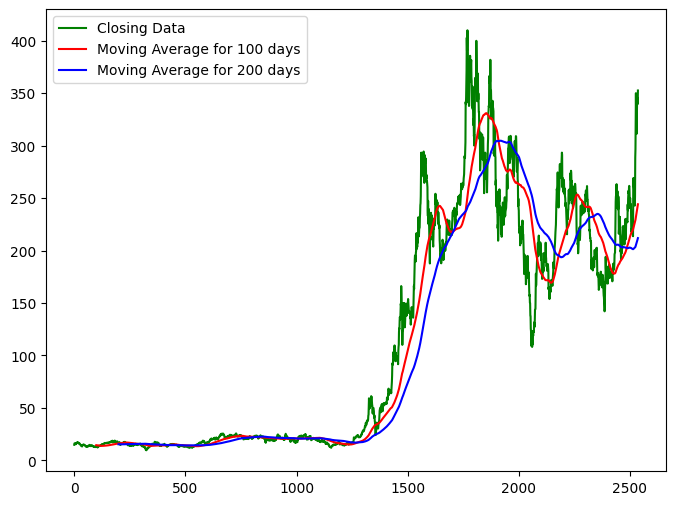

In [6]:
plt.figure(figsize=(8,6))
plt.plot(data.Close, 'g', label = 'Closing Data')
plt.plot(ma_100_days, 'r', label = 'Moving Average for 100 days')
plt.plot(ma_200_days, 'b', label = 'Moving Average for 200 days')
plt.legend()
plt.show()

In [7]:
data.dropna(inplace=True)

In [8]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [9]:
data_train.shape[0]

2029

In [10]:
data_test.shape[0]

508

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [14]:
x, y = np.array(x), np.array(y)

In [15]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 70, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.1))

model.add(LSTM(units = 90, activation='relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units =1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 75, batch_size =32, verbose =1)

Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 382ms/step - loss: 0.0420
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - loss: 0.0048
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 392ms/step - loss: 0.0032
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 388ms/step - loss: 0.0034
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 39s 367ms/step - loss: 0.0030
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 375ms/step - loss: 0.0028
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 377ms/step - loss: 0.0028
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 354ms/step - loss: 0.0026
Epoch 9/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 375ms/step - loss: 0.0028
Epoch 10/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 376ms/step - loss: 0.0040
Epoch 11/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 44s 428ms/step - loss: 0.0022
Epoch 12/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 377ms/step - loss: 0.0022
Epoch 13/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 356ms/step - loss: 0.0027
Epoch 14/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 43s 386ms/step - loss: 0.0023
Epoch 15/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 70)             │          20,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 70)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 90)             │          57,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 90)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 100)            │          76,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │         106,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 782,165 (2.98 MB)

 Trainable params: 260,721 (1018.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 521,444 (1.99 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

In [ ]:
print("Shape of y: "), print(y.shape)
print("Shape of y_predict: "), print(y_predict.shape)

Shape of y: 
(498,)
Shape of y_predict: 
(498, 1)


(None, None)

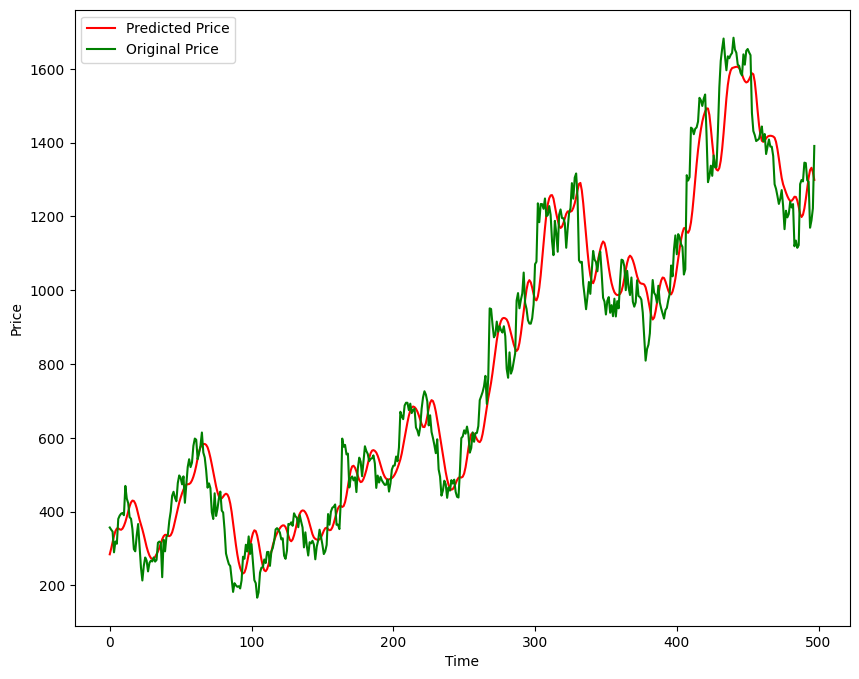

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/FinalStocks.keras')

Mounted at /content/drive


In [ ]:
model.save('Stock Predictions Model.keras')